In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

This code defines the object points and performs Direct Linear Transform (DLT) using numpy's linalg.lstsq function. It calculates the projection matrix, P, from the intrinsic camera matrix, K, and extrinsic matrix, E. Then it projects the object points to the image points and calculate the error between these two points. Finally, it plots the image with the object points and image points, showing the error.

This code is showing a basic example of camera calibration without using OpenCV libraries and it may need to be adjusted to match your specific use case. Additionally, you may have to use more complex camera model with more parameters for more accurate calibration.

[[ 982 2046]
 [ 986 2228]
 [1004 2396]
 [1009 2586]
 [1017 2745]
 [1925 2015]
 [1920 2192]
 [1920 2369]
 [1920 2541]
 [1916 2705]
 [1287 2161]
 [1292 2316]
 [1292 2484]
 [1783 2488]
 [1787 2329]
 [1787 2161]
 [1544 2091]
 [1544 2245]
 [1544 2400]
 [1548 2555]]


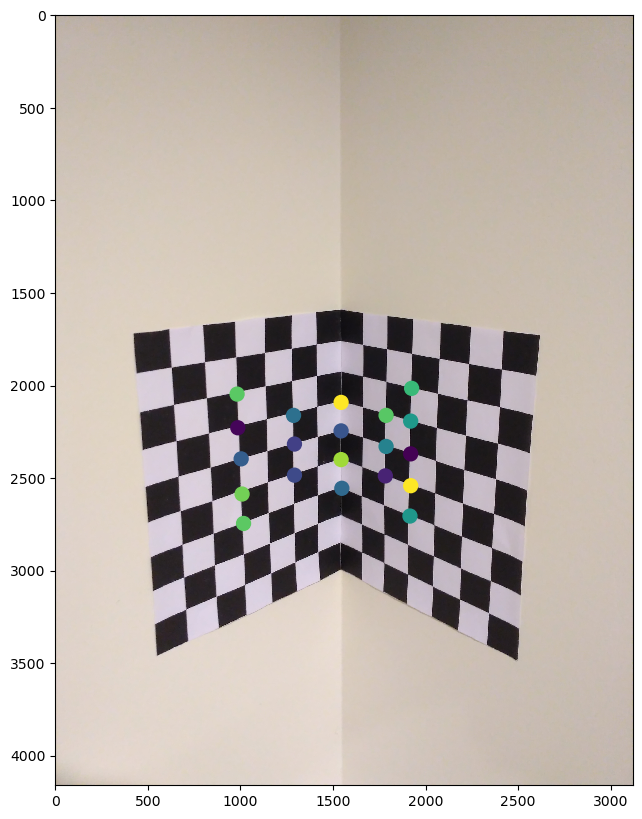

In [128]:
# Load the image
#img = plt.imread('calib-object.jpg')
image_points = []
fig = plt.figure(figsize=(10,10))

img=mpimg.imread('calib-object.jpg')
imgplot = plt.imshow(img)
#plt.show()

image_points= np.array([(982,2046),
(986,2228),
(1004,2396),
(1009,2586),
(1017,2745),
(1925,2015),
(1920,2192),
(1920,2369),
(1920,2541),
(1916,2705),
(1287,2161),
(1292,2316),
(1292,2484),
(1783,2488),
(1787,2329),
(1787,2161),
(1544,2091),
(1544,2245),
(1544,2400),
(1548,2555)])

N= len(image_points)
print(image_points)
colors = np.random.rand(N)
area = (10 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()


In [129]:
x = image_points
# X represents the 3D world points
X = [[0,2,4],[0,3,4],[0,4,4],[0,5,4],[0,6,4],[3,2,0],[3,3,0],[3,4,0],[3,5,0],[3,6,0],[0,3,2],[0,4,2],[0,5,2],[2,3,0],[2,4,0],[2,5,0],[0,3,0],[0,4,0],[0,5,0],[0,6,0]]

X = np.array(X)

In [130]:


#appends a ones column to input
def homogeneous_coords(x,X):
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate((x,ones),axis = 1)
    X = np.concatenate((X,ones),axis = 1)
    return x, X

print(X.shape)
x,X = homogeneous_coords(x,X)
print(X.shape)


(20, 3)
(20, 4)


In [131]:
img_coords = x - np.array([[1547.94658397, 1595.85199831]])

import pprint
pprint.pprint(img_coords.tolist())

pprint.pprint("-"*9)
pprint.pprint(X.tolist())

ValueError: operands could not be broadcast together with shapes (20,3) (1,2) 

In [91]:
def DLT(x,X):
    print(x.shape)
    print(X.shape)
    n = x.shape[0]

    i = 0
    A = np.zeros((2*n + 2,12))
    print(len(A))

    A[0] = [-X[i][0], -X[i][1], -X[i][2], -X[i][3], 0, 0, 0, 0, x[i][0] * X[i][0], x[i][0] * X[i][1], x[i][0] * X[i][2], x[i][0] * X[i][3]]
    A[1] = [0, 0, 0, 0, -X[i][0], -X[i][1], -X[i][2], -X[i][3], x[i][1] * X[i][0], x[i][1] * X[i][1], x[i][1] * X[i][2], x[i][1] * X[i][3]]
    
    for i in range(1, n):
        A[2*i] = [-X[i][0],-X[i][1],-X[i][2],-X[i][3],0,0,0,0,x[i][0]*X[i][0],x[i][0]*X[i][1],x[i][0]*X[i][2],x[i][0]*X[i][3]]
        A[2*i+1] = [0,0,0,0,-X[i][0],-X[i][1],-X[i][2],-X[i][3],x[i][1]*X[i][0],x[i][1]*X[i][1],x[i][1]*X[i][2],x[i][1]*X[i][3]]
    print(A.shape)

    U,S,V = np.linalg.svd(A)
    P = V[-1].reshape(3,4)
    P = P/P[2][3]
    
    return P

P = DLT(x,X)
print(P)

(20, 3)
(20, 4)
42
(42, 12)
[[-2.52604310e+02 -9.08210959e+01 -2.20085653e+02  1.53159932e+03]
 [-4.21986929e+02 -9.52811903e+01 -2.58900477e+02  2.12180999e+03]
 [-1.84056596e-01 -6.03060708e-02 -1.14087669e-01  1.00000000e+00]]


In [132]:
def DLT(x,X):
    """
    input x: the image points
    X: world points
    return Projection matrix (3x4)
    """
    i = 0
    M = np.array([-X[i][0], -X[i][1], -X[i][2], -X[i][3], 0, 0, 0, 0, x[i][0] * X[i][0], x[i][0] * X[i][1], x[i][0] * X[i][2], x[i][0] * X[i][3]])
    M = np.vstack((M, [0, 0, 0, 0, -X[i][0], -X[i][1], -X[i][2], -X[i][3], x[i][1] * X[i][0], x[i][1] * X[i][1], x[i][1] * X[i][2], x[i][1] * X[i][3]]))
      
    for i in range(len(x)):
        M = np.vstack((M, [-X[i][0], -X[i][1], -X[i][2], -X[i][3], 0, 0, 0, 0, x[i][0] * X[i][0], x[i][0] * X[i][1], x[i][0] * X[i][2], x[i][0] * X[i][3]]))
        M = np.vstack((M, [0, 0, 0, 0, -X[i][0], -X[i][1], -X[i][2], -X[i][3], x[i][1] * X[i][0], x[i][1] * X[i][1], x[i][1] * X[i][2], x[i][1] * X[i][3]]))
    print(M.shape)
    u, d, vt = np.linalg.svd(M, full_matrices = True)
    
    P = vt[-1].reshape(3,4)
    P = P/P[2][3]
    return P
   


P = DLT(x,X)
P

(42, 12)


array([[-2.61362000e+02, -8.01541077e+01, -2.34104343e+02,
         1.52253387e+03],
       [-4.36320419e+02, -8.10832749e+01, -2.81399141e+02,
         2.11760052e+03],
       [-1.90312103e-01, -5.47294105e-02, -1.23432915e-01,
         1.00000000e+00]])

In [135]:
# def get_reprojection_points(P, X):
#     points = P @ X.T
#     points = points / points[2]
#     points = points.T[:,0:2]
#     return points

# def get_reprojection_err(x, X, P):
#     reprojected_points = get_reprojection_points(P, X)    
#     err = np.mean(np.square(reprojected_points - x[:,:-1]))
#     return err

# print("Reprojection Error: ", get_reprojection_err(x, X, P))

# print("reprojection_points =", get_reprojection_points(P, X))
#Get reprojected points
def get_points(P,X,norm = False,T_ = None):
    points = P@X.T
    if(norm==True):
        points = np.linalg.inv(T_)@points
    points = points / points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    points,_ = homogeneous_coords(points,x)
    err = np.sqrt(np.mean((points - x) ** 2))
    print(err)
    return err
# err = get_err(x,X,P)

get_points(P, np.array([[0, 0, 0, 1]]))

array([[1522.53386769, 2117.60052442]])

In [95]:
def ret_RKT(P):
    R_dim = P[:,0:3]
    T_dim = P[:,3]
    K, R = np.linalg.qr(R_dim)
    K = K/K[2,2]
    t = np.dot(np.linalg.inv(K),T_dim)
    return R, K , t


R, K, T = ret_RKT(P)
print(R, K, T)





# def reproject(P,X,norm=False,T_=None):  
    
#     re_proj = get_points(P, X, norm, T_)
#     re_proj = np.array(re_proj).astype('float32') 

#     finalX = np.hstack((x[ : , 0], re_proj[ : , 0]))
#     finalY = np.hstack((x[ : , 1], re_proj[ : , 1]))

#     %matplotlib inline
#     N = len(finalX)
    
#     fig = plt.figure(figsize=(10,10))

#     img=mpimg.imread('calib-object.jpg')
#     imgplot = plt.imshow(img)

#     colors = np.random.rand(N)
#     area = (10 * np.ones(N))**2 
    
#     plt.scatter(finalX[ : ], finalY[ : ], c = colors, s = area)
#     plt.show()
    
# reproject(P,X)



[[ 5.08611482e+02  1.10747670e+02  3.61702794e+02]
 [ 0.00000000e+00 -2.70949244e+01 -5.62265289e+01]
 [ 0.00000000e+00  0.00000000e+00  3.94876777e-02]] [[-5.13873671e-01  8.57865872e-01 -6.13058659e-04]
 [-8.57866010e-01 -5.13873803e-01 -6.89444366e-05]
 [-3.74179793e-04  4.90493362e-04  1.00000000e+00]] [-2.59900697e+03  2.17950817e+02 -7.93993167e-02]


In [96]:
def projection_matrix(K, R, t):
    P = np.zeros((3, 4))
    P[:3, :3] = np.dot(K, R)
    P[:, 3] = np.dot(K, t)
    return P

P_r = projection_matrix(K, R, T)
print("Reconstructed P: \n",P_r)
R_est, K_est, T_est = ret_RKT(P_r)


print("Estimated R, K, T: \n")
print(R_est, K_est, T_est)


Reconstructed P: 
 [[-2.61362050e+02 -8.01541230e+01 -2.34104387e+02  1.52253387e+03]
 [-4.36320502e+02 -8.10832903e+01 -2.81399195e+02  2.11760052e+03]
 [-1.90312139e-01 -5.47294209e-02 -1.23432938e-01  1.00000000e+00]]
Estimated R, K, T: 

[[ 5.08611579e+02  1.10747692e+02  3.61702863e+02]
 [ 0.00000000e+00 -2.70949295e+01 -5.62265396e+01]
 [ 0.00000000e+00  0.00000000e+00  3.94876852e-02]] [[-5.13873671e-01  8.57865872e-01 -6.13058659e-04]
 [-8.57866010e-01 -5.13873803e-01 -6.89444366e-05]
 [-3.74179793e-04  4.90493362e-04  1.00000000e+00]] [-2.59900697e+03  2.17950817e+02 -7.93993167e-02]


NameError: name 'reprojection_points' is not defined

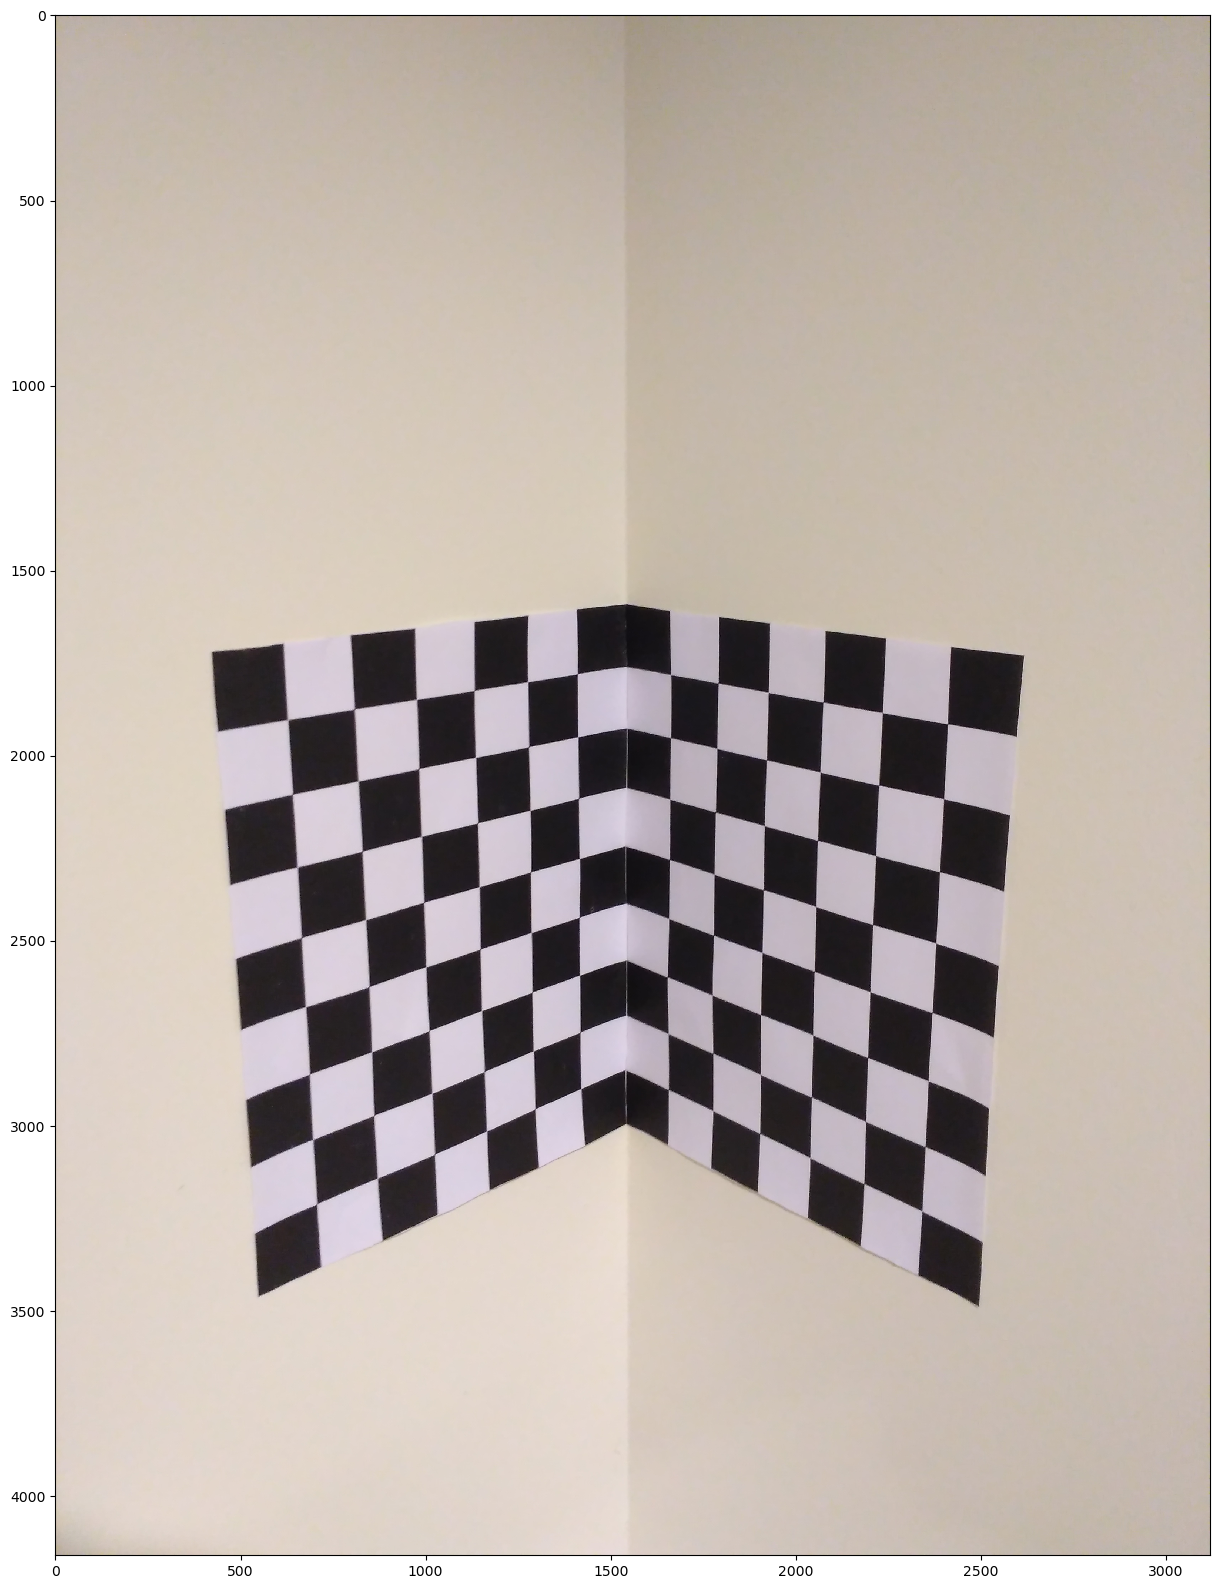

In [97]:
fig = plt.figure(figsize=(20,20))

img=mpimg.imread('calib-object.jpg')
imgplot = plt.imshow(img)
colors = np.random.rand(N)
area = (15 * np.ones(N))**2
plt.scatter(reprojection_points[:,0], reprojection_points[:,1], c=colors, s=area) #scattering points above iamge. 
plt.show()



# def plot_wireframe(projections, image):
#     '''
#     projections: n_samples X 2 ((height * width) X 2D point coordinate)
#     image: on which wireframe has to be plotted
#     '''
#     # Plotting image points on the image
#     plt.scatter(projections[:,0], projections[:, 1],projections[:, 2], color='r', s=13, lw=1)

#     # This is plotting vertical lines
#     # We are finding two points across which we want to join a line. For this we are finding the nth and n+6th point for every line
#     # This can be changes with you use case
#     for (u, v) in zip(range(0, 48, 6), range(5, 48, 6)):
#         plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]],[projections[u, 2], projections[v, 2]], color='r')

#     # Here the points are plotting horizontal lines
#     for (u, v) in zip(range(6), range(42, 48)):
#         plt.plot([projections[u, 0], projections[v, 0]], [projections[u, 1], projections[v, 1]],[projections[u, 2], projections[v, 2]], color='r')
    
#     plt.imshow(image)

# #plot_wireframe(P, img)

# def create_wireframe(projection_matrix, image):
#     # Get image dimensions
#     h, w = image.shape[:2]

#     # Create 3D points for the wireframe
#     wireframe_points = np.array([[0, 0, 0], [w, 0, 0], [w, h, 0], [0, h, 0],
#                                 [0, 0, 1], [w, 0, 1], [w, h, 1], [0, h, 1]])

#     # Project the 3D points to 2D using the projection matrix
#     wireframe_points_2d = np.matmul(projection_matrix, wireframe_points.T).T

#     # Normalize the 2D points
#     wireframe_points_2d[:, 0] /= wireframe_points_2d[:, 2]
#     wireframe_points_2d[:, 1] /= wireframe_points_2d[:, 2]
#     wireframe_points_2d = wireframe_points_2d[:, :2]

#     # Draw the wireframe on the image
#     for (u, v) in [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)]:
#         cv2.line(image,(int(wireframe_points_2d[u, 0]), int(wireframe_points_2d[u, 1])), (int(wireframe_points_2d[v, 0]), int(wireframe_points_2d[v, 1])), (0, 255, 0), 2)
#     return image 


# wireframe_image = create_wireframe(P, img)
# cv2.imshow("Wireframe", wireframe_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [74]:

def DLT(points1, points2):
    # DLT algorithm to estimate the parameters of the model
    A = []
    for i in range(points1.shape[0]):
        x, y = points1[i, :]
        u, v = points2[i, :]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    H = V[-1, :].reshape((3, 3))
    return H / H[2, 2]

def RANSAC_DLT(points1, points2, threshold, n_iterations):
    best_inliers = []
    best_H = None
    for _ in range(n_iterations):
        # Select a random subset of the data points
        subset_indices = np.random.randint(0, points1.shape[0], 4)
        subset1 = points1[subset_indices, :]
        subset2 = points2[subset_indices, :]
        
        # Estimate the parameters of the model using the selected subset of points
        H = DLT(subset1, subset2)
        
        # Calculate the error for all the other data points
        transformed_points1 = np.dot(H, np.pad(points2, ((0, 0), (0, 1)), mode='constant'))
        transformed_points1 = transformed_points1[:, :2] / transformed_points1[:, 2:]
        errors = np.linalg.norm(transformed_points1 - points1, axis=1)
        
        # Store the inliers
        inliers = np.where(errors < threshold)[0]
        if inliers.size > best_inliers:
            best_inliers = inliers
            best_H = H
    return best_H, best_inliers

# Example usage
points1 = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
points2 = np.array([[2, 4], [4, 8], [6, 12], [8, 16], [10, 20]])
threshold = 0.5
n_iterations = 100
H, inliers = RANSAC_DLT(points1, points2, threshold, n_iterations)

ValueError: cannot reshape array of size 8 into shape (3,3)